<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/PlotTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this tutor, I will guild how to import and presentation a time serier data with Python. Specifically, a Dexcom G6 glucose values data file in .cvs format from Dexcom is used. 

The tutor has two part:
* Intros about timestamp format which pandas can read
* Convert from string to datetime format 
* Read data file and plot data using read_csv and plot
* Using plotly for quick plot

## Overview on the datetime format
When we design a logging system, we should writting the timestamp in some kinds of standard format for time in order to help processing data language easly reading and prortably using between different systems. 

- In python, the format is followed the some notation as below:
*  

1. dd/mm/YYYY HH:MM:SS   eg. 24/05/2020 20:45:56
2. mm/dd/YYYY HH:MM:SS       05/24/2020 20:45:56
3. mm-dd-YYYY HH:MM:SS       05-24-2020 20:45:56
4. mm-dd-YYYY                05-24-2020

Detail for time format in Python:
https://docs.python.org/3/library/time.html#time.time

In order to read a string to python datetime format is must in the format as described below:

*format* = "%d/%m/%Y %H:%M:%S.%f"
time1 = now.**strftime**(*format*)

This format is [**ISO 8601**](https://stackabuse.com/converting-strings-to-datetime-in-python/) standard

%Y: Year (4 digits)
%m: Month
%d: Day of month
%H: Hour (24 hour)
%M: Minutes
%S: Seconds
%f: Microseconds


***strftime*** is a function in datetime package which convert a string to datetime object. A full list of datetime format for reference can be seen as the link below:

https://www.programiz.com/python-programming/datetime/strftime

### Example of display in Hour

In [4]:
# Display the moment time in Hours
from datetime import  datetime

#current date and time
now = datetime.now()
#time format: H:M:S
format = "%H:%M:%S"
#format datetime using strftime()
time1 = now.strftime(format)

print("Formatted Date:", time1)

Formatted Date: 01:00:42


### Example of display in Date

In [6]:
from datetime import datetime

# current date and time
now = datetime.now()
# date format: dd-mm-yyyy
format = "%d-%m-%Y"
#format datetime using strftime()
date1 = now.strftime(format)

print("Formatted Date:", date1)

Formatted Date: 15-03-2021


#### What if we have a typo in format as "d-%m-%Y" (loss a '%' sign above of 'd')

---



In [8]:
format = "d-%m-%Y"
date1 = now.strftime(format)

print("Formatted Date:", date1)


Formatted Date: d-03-2021


In [1]:
def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data

### Datetime format in ISO 8601
In our example, dexcom date time in the ISO 8601 format, so we should know some way to deal with it

In [16]:
from datetime import datetime
import pytz

# express time in normal
x = datetime.today()
print("Normal format:", x)


Normal format: 2021-03-15 05:27:02.364174


In [18]:
# express time in iso
print("ISO 8601 format:", x.isoformat())
print("ISO 8601 format without separator 'T':", x.isoformat(sep=' '))

ISO 8601 format: 2021-03-15T05:27:02.364174
ISO 8601 format without separator 'T': 2021-03-15 05:27:02.364174


Aware object isoformat example

In [23]:
x = datetime(2021,3,15)
timezone = pytz.timezone('Asia/Seoul')
x = x.astimezone(timezone)
print("ISO 8601 format for an aware object:", x.isoformat())

ISO 8601 format for an aware object: 2021-03-15T09:00:00+09:00


### reading data by

# Reading Data and Plot with numpy.datetime64

First, import the file into program using read_csv()

In [72]:
from pandas import read_csv
file_path = 'drive/My Drive/Dataset/GlucoseLong02_12Mar.csv'
dataset = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv', header=0)

Checking head of the dataset

In [13]:
import matplotlib.pyplot as plt

dataset.head()

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
0,1,NaN,FirstName,NaN,Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,Nguyen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Device,NaN,NaN,Dexcom Receiver with G6,PG00804102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Alert,Fall,NaN,NaN,PG00804102,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,5,NaN,Alert,High,NaN,NaN,PG00804102,310.0,NaN,NaN,NaN,NaN,NaN,NaN


Because the first 15 row is information so we drop it and try to draw. 

In [73]:
data = dataset.values
t = data[11:,1]
glucose = data[11:,7]

type(t[0])

str

Plot data with t: t is array of string

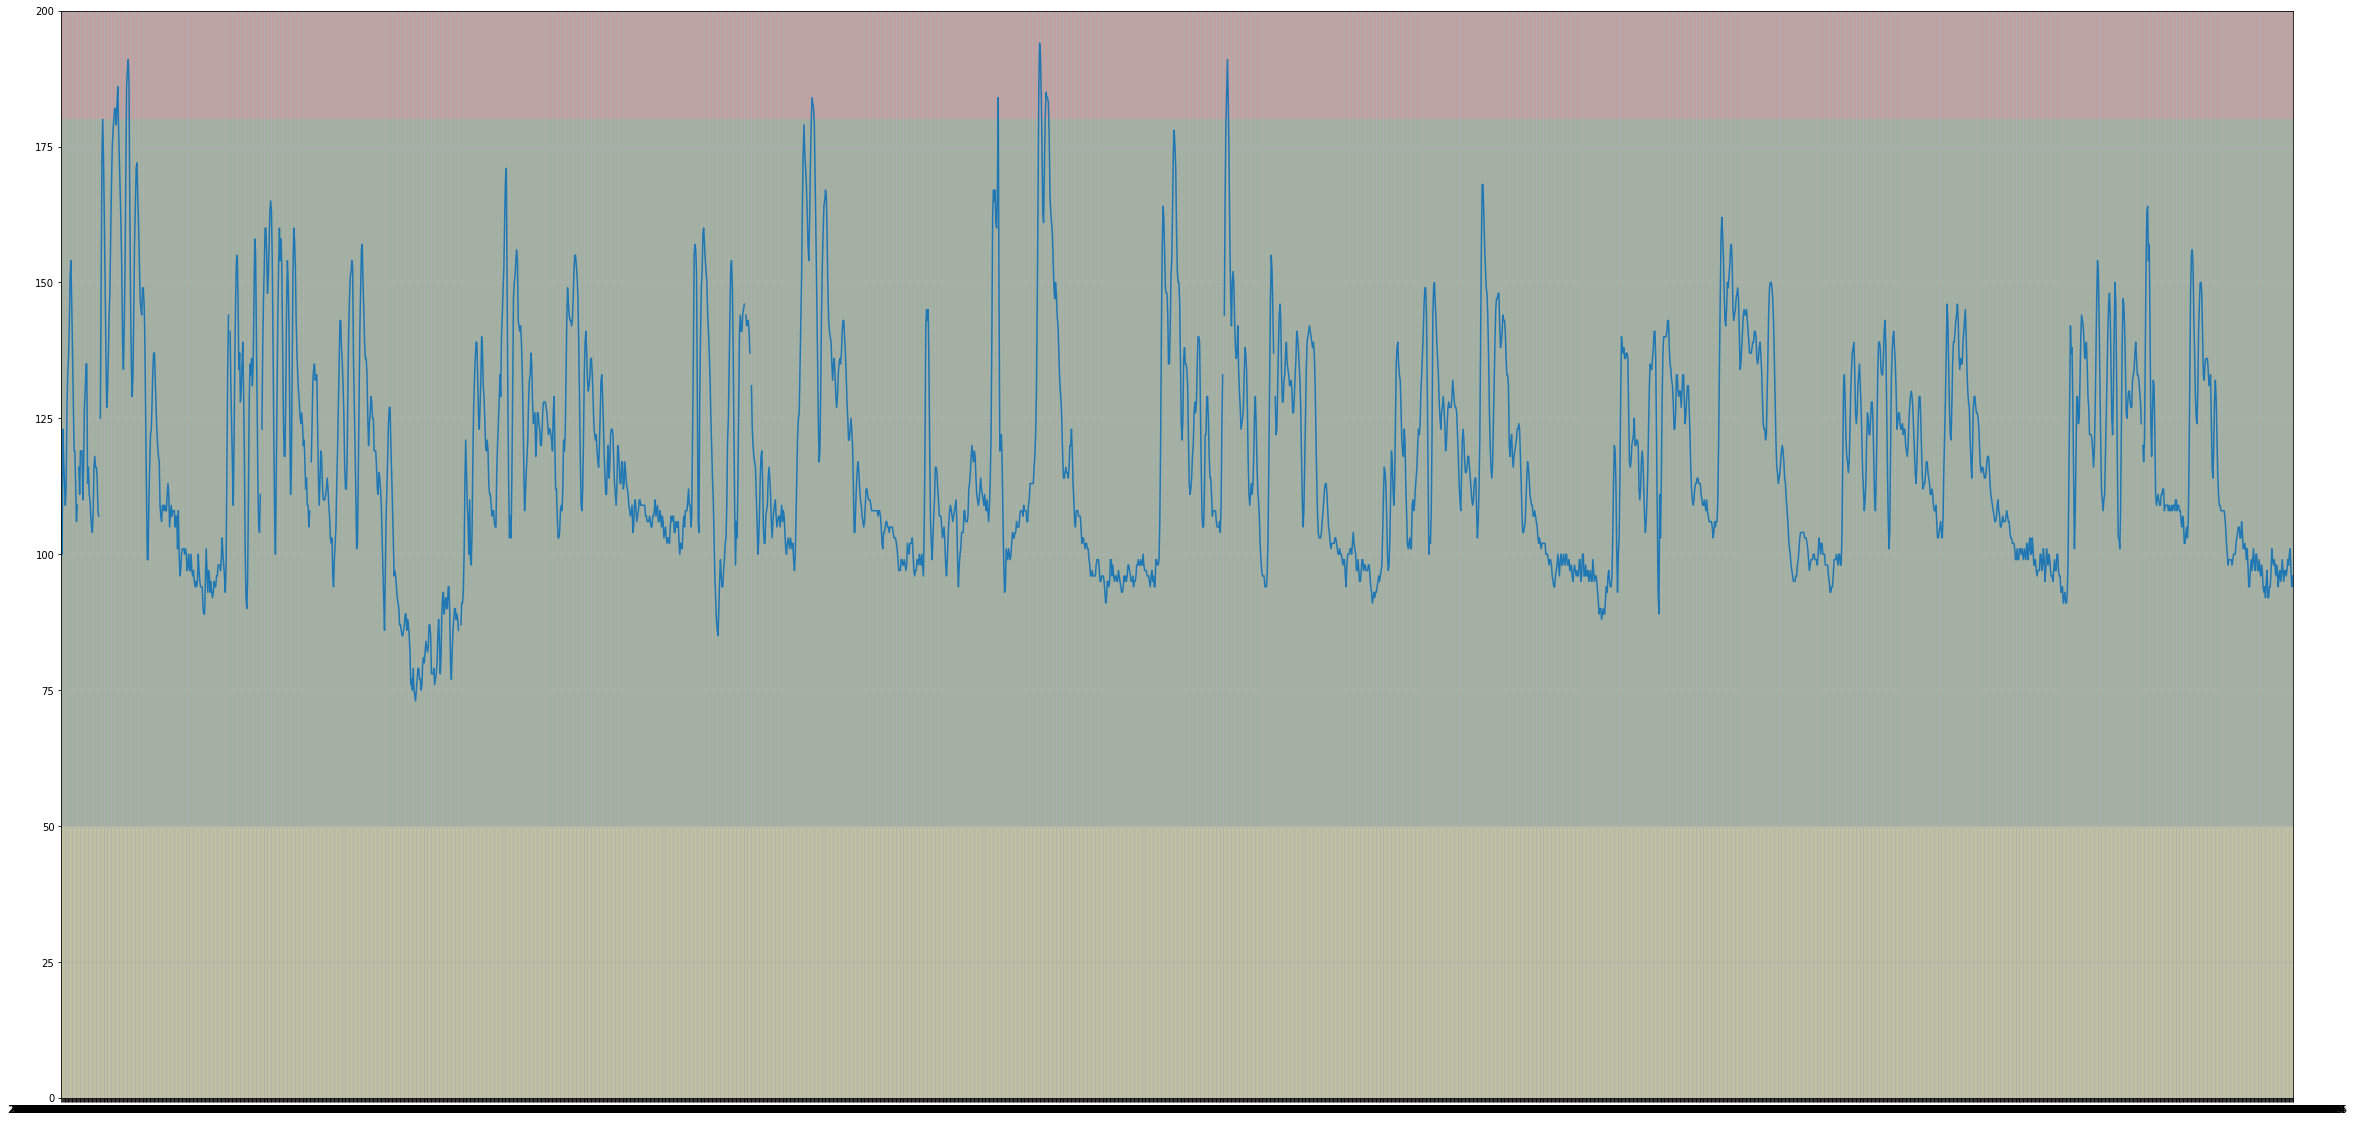

In [14]:
## Plot data === impossible to display date on x axis

# plot data with different background

fig, ax = plt.subplots(1,figsize=(25,15))

ax.plot(t, glucose)
ax.grid()
ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 50, facecolor='yellow', alpha=0.6)
ax.axhspan(50, 180, facecolor='green', alpha=0.6)
ax.axhspan(180, 200, facecolor='red', alpha=0.6)

plt.show()



The string data need to convert to list of timestamp or list of string in iso 8061. 

In order to do this we use numpy.datetime64() to convert to the right format

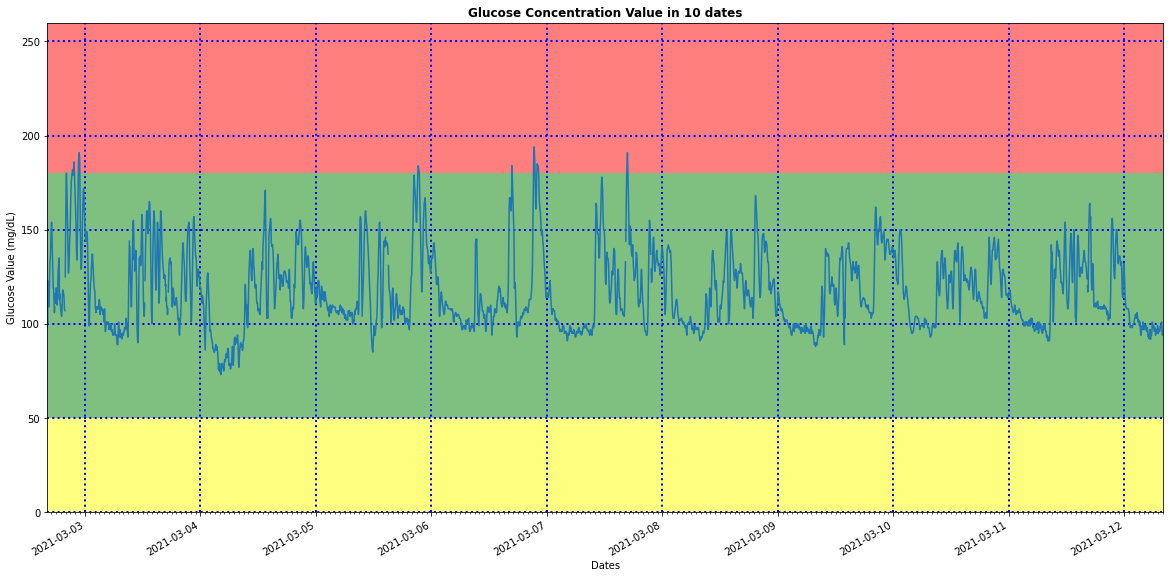

In [75]:
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 

# convert to timestamp
#timestamp = np.array([datetime.datetime.timestamp(datetime.datetime.strptime(time,"%Y-%m-%dT%H:%M:%S")) for time in t])
#timestamp = [datetime.datetime.timestamp(datetime.datetime.strptime(time,"%Y-%m-%d")) for time in dates]
timenp64 = [np.datetime64(time) for time in t]

plt.rc('grid', linestyle=':', color='b', linewidth=2)
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(timenp64, glucose)

ax.set(ylim=[0,260], ylabel='Glucose Value (mg/dL)', xlabel = 'Dates')
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator())  
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) 
ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')

ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 50, facecolor='yellow', alpha=0.5)
ax.axhspan(50, 180, facecolor='green', alpha=0.5)
ax.axhspan(180, 260, facecolor='red', alpha=0.5)

ax.grid(True)
fig.autofmt_xdate() 
plt.title('Glucose Concentration Value in 10 dates', fontweight ="bold") 
plt.show()

In [61]:
t

array(['2021-03-02T16:10:01', '2021-03-02T16:15:02',
       '2021-03-02T16:15:52', ..., '2021-03-12T07:55:24',
       '2021-03-12T08:00:24', '2021-03-12T08:05:25'], dtype=object)

In [ ]:
timestamp, dates1

(array([1.61470140e+09, 1.61470170e+09, 1.61470175e+09, ...,
        1.61553572e+09, 1.61553602e+09, 1.61553632e+09]),
 array([737517.  , 737517.25, 737517.5 , 737517.75, 737518.  , 737518.25,
        737518.5 , 737518.75, 737519.  , 737519.25, 737519.5 , 737519.75,
        737520.  , 737520.25, 737520.5 , 737520.75]))

### Convert to datetime

In [ ]:
print(datetime.datetime.fromtimestamp(timestamp[0]))

2021-03-02 16:10:01


In [ ]:
timestamp[0]

1614701401.0

In [ ]:
# seperate data to display
time = [date.split('T') for date in t]
dates = [ date for date, hour in time]
hours = [ hour for date, hour in time]

In [ ]:
dates[0], hours[0]

('2021-03-02', '16:10:01')

In [ ]:
len(y)

16

###Convert time string to timestamp

In [43]:
import time 
import datetime 

 
string = "2018-11-12T09:15:32"
dt_obj = datetime.datetime.strptime(string, "%Y-%m-%dT%H:%M:%S")
print(dt_obj)
element = datetime.datetime.strptime(string,"%Y-%m-%dT%H:%M:%S") 
timestamp = datetime.datetime.timestamp(element) 
print(type(timestamp))

2018-11-12 09:15:32
<class 'float'>


In [ ]:
import datetime 
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 

date1 = datetime.datetime(2020, 4, 2) 
date2 = datetime.datetime(2020, 4, 6) 
delta = datetime.timedelta(hours = 6) 
dates1 = drange(date1, date2, delta)

In [ ]:
print((timestamp[0:10]))
print((dates1))

[1.61470140e+09 1.61470170e+09 1.61470175e+09 1.61470201e+09
 1.61470230e+09 1.61470260e+09 1.61470290e+09 1.61470320e+09
 1.61470350e+09 1.61470380e+09]
[737517.   737517.25 737517.5  737517.75 737518.   737518.25 737518.5
 737518.75 737519.   737519.25 737519.5  737519.75 737520.   737520.25
 737520.5  737520.75]


###Example of Plot Datetime series
+ Plot_date is not work for the moment with timestamp format in 

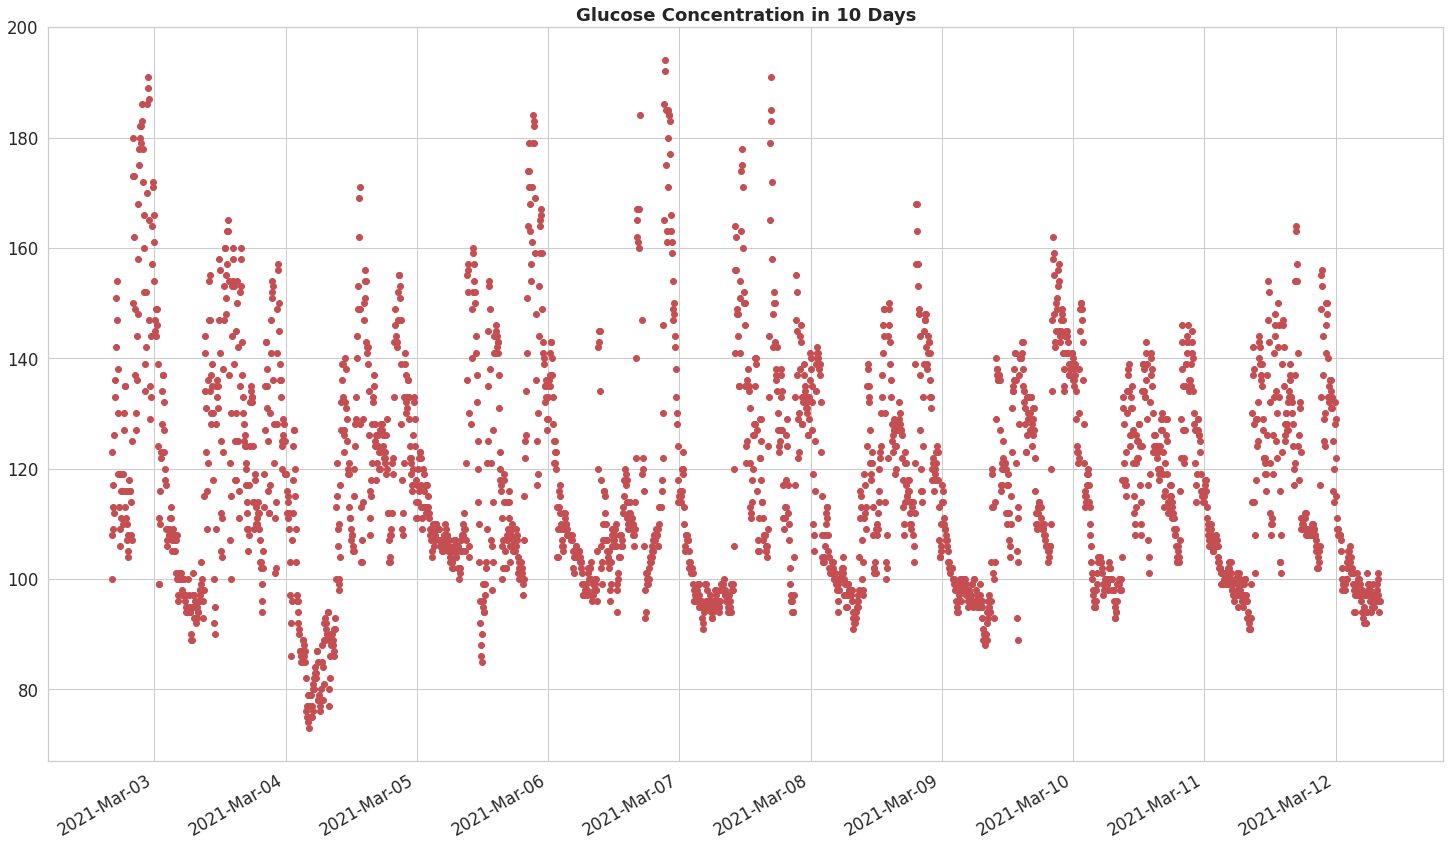

In [79]:
import datetime
import time
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

# convert to timestamp
timenp64 = [np.datetime64(time) for time in t]
#timestamp = np.array([datetime.datetime.timestamp(datetime.datetime.strptime(time,"%Y-%m-%dT%H:%M:%S")) for time in t])
fig, ax = plt.subplots(1, figsize=(25,15))
ax.plot_date(timenp64, glucose,'ro')

ax.xaxis.set_major_locator(DayLocator()) 
#ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6))) 

ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d')) 
ax.fmt_xdata = DateFormatter('%Y-%b-%d %H:%M:%S')
fig.autofmt_xdate() 
plt.title('Glucose Concentration in 10 Days', fontweight ="bold") 
plt.show()

## Explore Dataset

In [80]:
dataset.head()

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
0,1,NaN,FirstName,NaN,Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,Nguyen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Device,NaN,NaN,Dexcom Receiver with G6,PG00804102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Alert,Fall,NaN,NaN,PG00804102,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,5,NaN,Alert,High,NaN,NaN,PG00804102,310.0,NaN,NaN,NaN,NaN,NaN,NaN


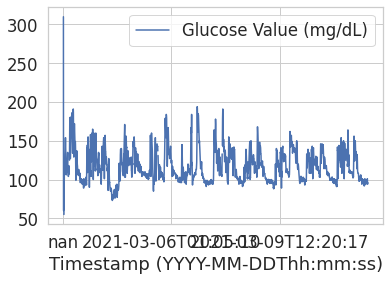

In [81]:
dataset.plot(x = 'Timestamp (YYYY-MM-DDThh:mm:ss)', y = 'Glucose Value (mg/dL)')

In [82]:
dataset[ 'Timestamp (YYYY-MM-DDThh:mm:ss)'].describe()

count                    2806
unique                   2806
top       2021-03-10T06:30:19
freq                        1
Name: Timestamp (YYYY-MM-DDThh:mm:ss), dtype: object

In [ ]:
dataset.dtypes

Index                                   int64
Timestamp (YYYY-MM-DDThh:mm:ss)        object
Event Type                             object
Event Subtype                          object
Patient Info                           object
Device Info                            object
Source Device ID                       object
Glucose Value (mg/dL)                 float64
Insulin Value (u)                     float64
Carb Value (grams)                    float64
Duration (hh:mm:ss)                    object
Glucose Rate of Change (mg/dL/min)    float64
Transmitter Time (Long Integer)       float64
Transmitter ID                         object
dtype: object

In [41]:
# read datset with using timestamp for Index and skip first 11 rows
dataset = read_csv(file_path,
                   
                   parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   skiprows= [i for i in range(1,11)],
                   na_values= ['nan'])

In [31]:
dataset.head()

,Index,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Timestamp (YYYY-MM-DDThh:mm:ss),,,,,,,,,,,,,
2021-03-02 16:05:02,11,EGV,NaN,NaN,NaN,PG00804102,116.0,NaN,NaN,NaN,NaN,2443273.0,8KMNYT
2021-03-02 16:10:01,12,EGV,NaN,NaN,NaN,PG00804102,108.0,NaN,NaN,NaN,NaN,2443573.0,8KMNYT
2021-03-02 16:15:02,13,EGV,NaN,NaN,NaN,PG00804102,100.0,NaN,NaN,NaN,NaN,2443873.0,8KMNYT
2021-03-02 16:15:52,14,Calibration,NaN,NaN,NaN,PG00804102,123.0,NaN,NaN,NaN,NaN,NaN,8KMNYT
2021-03-02 16:20:09,15,EGV,NaN,NaN,NaN,PG00804102,117.0,NaN,NaN,NaN,NaN,2444181.0,8KMNYT


In [32]:
dataset['Glucose Value (mg/dL)'].describe()

count    2792.000000
mean      117.746418
std        20.475908
min        73.000000
25%       102.000000
50%       113.000000
75%       132.000000
max       194.000000
Name: Glucose Value (mg/dL), dtype: float64

In [33]:
dataset.describe()

,Index,Patient Info,Device Info,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
count,2806.000000,0.0,0.0,2792.000000,0.0,12.000000,0.0,2.779000e+03
mean,1413.500000,NaN,NaN,117.746418,NaN,84.583333,NaN,2.861050e+06
std,810.166752,NaN,NaN,20.475908,NaN,50.202242,NaN,2.414844e+05
min,11.000000,NaN,NaN,73.000000,NaN,10.000000,NaN,2.443273e+06
25%,712.250000,NaN,NaN,102.000000,NaN,35.000000,NaN,2.651323e+06
50%,1413.500000,NaN,NaN,113.000000,NaN,120.000000,NaN,2.861773e+06
75%,2114.750000,NaN,NaN,132.000000,NaN,120.000000,NaN,3.070123e+06
max,2816.000000,NaN,NaN,194.000000,NaN,150.000000,NaN,3.278473e+06


# Using pandas.read_csv() to 

In [34]:
dataset.index

DatetimeIndex(['2021-03-02 16:05:02', '2021-03-02 16:10:01',
               '2021-03-02 16:15:02', '2021-03-02 16:15:52',
               '2021-03-02 16:20:09', '2021-03-02 16:25:02',
               '2021-03-02 16:30:02', '2021-03-02 16:35:02',
               '2021-03-02 16:40:02', '2021-03-02 16:45:02',
               ...
               '2021-03-12 07:20:25', '2021-03-12 07:25:23',
               '2021-03-12 07:30:25', '2021-03-12 07:35:24',
               '2021-03-12 07:40:25', '2021-03-12 07:45:24',
               '2021-03-12 07:50:24', '2021-03-12 07:55:24',
               '2021-03-12 08:00:24', '2021-03-12 08:05:25'],
              dtype='datetime64[ns]', name='Timestamp (YYYY-MM-DDThh:mm:ss)', length=2806, freq=None)

##Simple plot

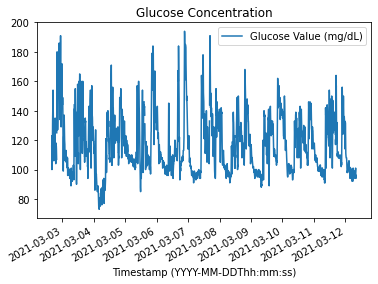

In [42]:
dataset.plot(y='Glucose Value (mg/dL)', title='Glucose Concentration')
plt.show()

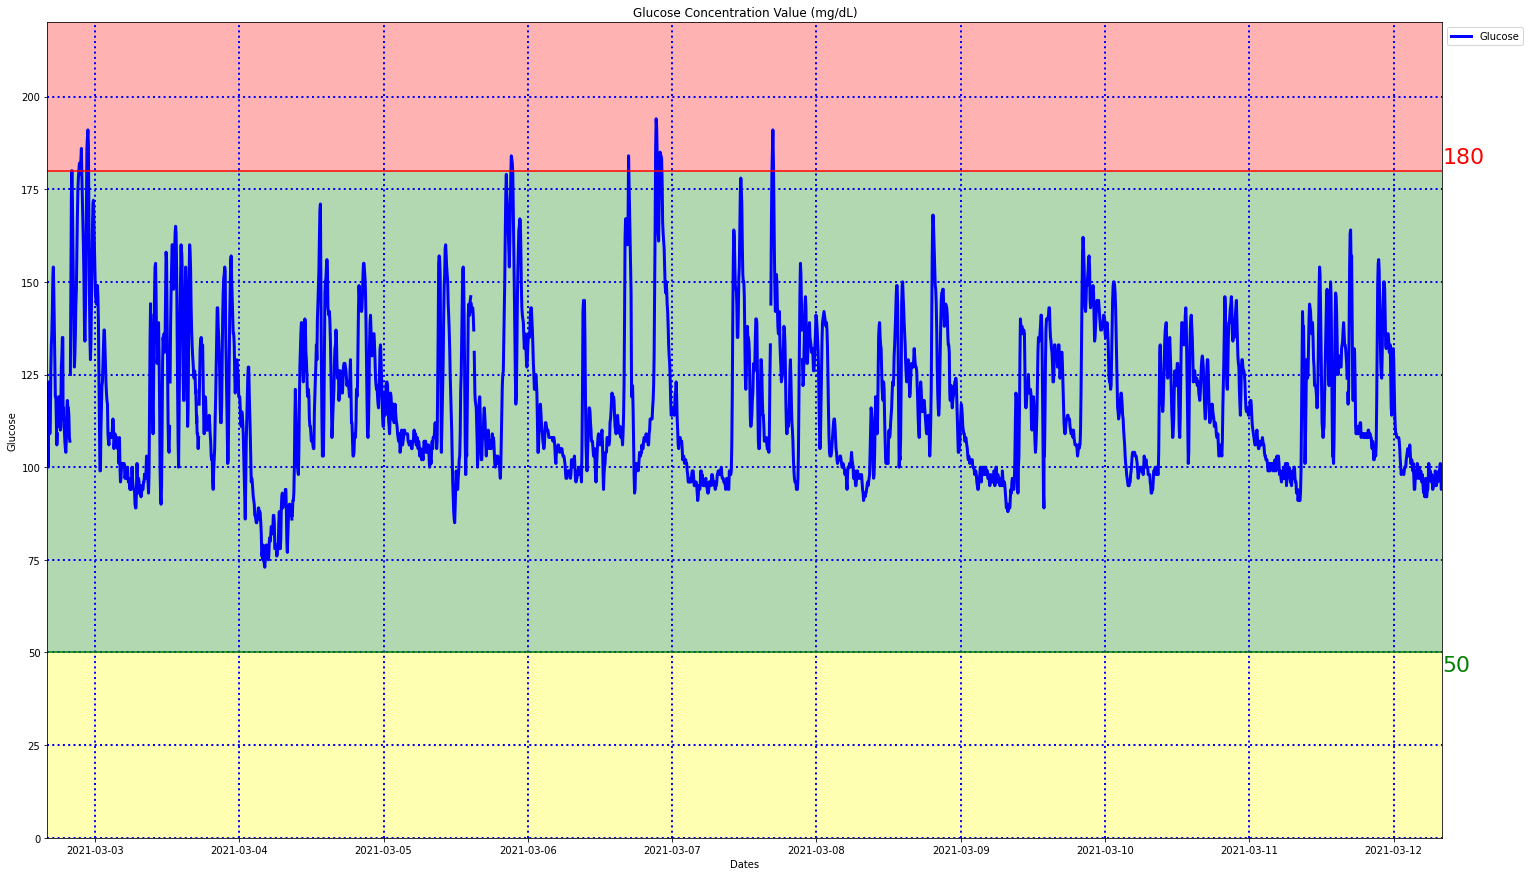

In [36]:
fig, ax = plt.subplots(1, figsize=(25,15))
plt.rc('grid', linestyle=':', color='b', linewidth=2)
ax.plot(dataset.index.values,
           dataset['Glucose Value (mg/dL)'], 'b',linewidth=3)
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axhline(y =50, color = 'green')
ax.axhline(y =180, color = 'red')
ax.axhspan(0, 50, facecolor='yellow', alpha=0.3)
ax.axhspan(50, 180, facecolor='green', alpha=0.3)
ax.axhspan(180, 220, facecolor='red', alpha=0.3)
#ax.grid(axis = 'x', axis='y')
ax.grid(True)

#ax.legend(["Glucose"]) 
ax.legend(["Glucose"], bbox_to_anchor = (1 , 1))
# Add title and axis names
plt.title('Glucose Concentration Value (mg/dL)')
plt.xlabel('Dates')
plt.ylabel('Glucose')
# Add number as a marker
plt.text(dataset.index.values[-1], 182, "180", color="red", fontsize=22)
plt.text(dataset.index.values[-1], 45, "50", color="green", fontsize=22)
#plt.yablel('Glucose Concentration Value (mg/dL)') 
plt.show()

Covert date in Format %Y-%M-%D to %D-%M-%Y

In [ ]:
def convert_date_format(s):
  date=s.split("-")
  return date[2]+"-"+date[1]+"-"+ date[0]
#convert to new format
dates_new = [convert_date_format(date) for date in dates]
dates_full = [date + ' ' + hour for date, hour in zip(dates_new, hours)]
dates_full[0], t[0]

('02-03-2021 16:10:01', '2021-03-02T16:10:01')

In [ ]:
from datetime import datetime

date_str1 = dates_new[0] + ' ' + hours[0]
date_str2 = dates_new[1] + ' ' + hours[1]
# Considering date is in dd/mm/yyyy format
date_obj1 = datetime.strptime(date_str1, "%d-%m-%Y %H:%M:%S")
date_obj2 = datetime.strptime(date_str2, "%d-%m-%Y %H:%M:%S")
print("dt_object1:", date_obj1)


dt_object1: 2021-03-02 16:10:01


# Using Plotly for quick plot time series data

In [ ]:
import plotly.graph_objects as go

from pandas import read_csv

df = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv')
print(df.head)

fig = go.Figure([go.Scatter(x=df['Timestamp (YYYY-MM-DDThh:mm:ss)'], y=df['Glucose Value (mg/dL)'])])
#fig.update_layout(legend_title_text = "Glucose Concentration in 10 Days")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Glucose Value (mg/dL)")
#fig.update_xaxes(range=[1.5, 4.5])
fig.update_yaxes(range=[0, 250])

#fig.add_hline(y=50)
#fig.add_hline(y=180)


fig.show()



<bound method NDFrame.head of       Index  ... Transmitter ID
0         1  ...            NaN
1         2  ...            NaN
2         3  ...            NaN
3         4  ...            NaN
4         5  ...            NaN
...     ...  ...            ...
2811   2812  ...         8KMNYT
2812   2813  ...         8KMNYT
2813   2814  ...         8KMNYT
2814   2815  ...         8KMNYT
2815   2816  ...         8KMNYT

[2816 rows x 14 columns]>


In [ ]:
import plotly.express as px

from pandas import read_csv

df = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv')
#read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv',usecols=['Timestamp (YYYY-MM-DDThh:mm:ss)','Glucose Value (mg/dL)'])
fig = px.scatter(df, x='Timestamp (YYYY-MM-DDThh:mm:ss)', y='Glucose Value (mg/dL)',title="Glucose in 10 days")
#fig.add_hline(y=50)
#fig.add_hline(y=50, color='yellow')

fig.show()
